# ФИО студента: Синягин Илья
# Группа: 18-ИВТ-3
# Вариант: 7
# Задание: Camera

#### 1) Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы
#### 2) Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value
#### 3) Постройте график изменения средней цены на камеры по годам
#### 4) Определите компанию, камеры которой наиболее часто встречаются в наборе данных
#### 5) Добавьте в набор данных признак, являющийся произведением двух других признаков
#### 6) Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления
#### 7) Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью
#### 8) Определите год, в который было выпущено максимально количество новых камер

### Библиотеки:

In [6]:
from __future__ import(absolute_import, division, print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Populating the interactive namespace from numpy and matplotlib


In [16]:
import pandas as pan
import seaborn as sea
%matplotlib inline
fail = dp.read_csv('7_camera.csv')

## Пункт №1

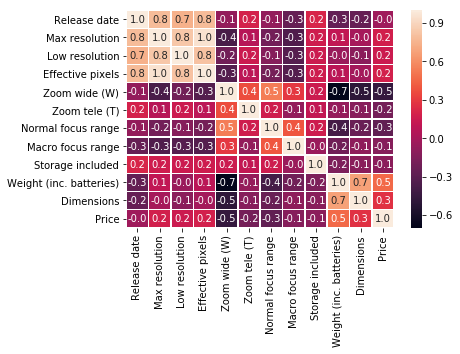

In [17]:
sea.heatmap(fail.corr(), annot = True, fmt = '.1f', linewidths = .5)

#### Вывод:
##### Минимальное значение корреляции между признаком 'Zoom wide (W)' с параметрами 'Price', 'Weight (inc. batteries)', 'Dimensions', и максимальное значение корреляции между признаком 'Release date' с параметрами 'Low resolution', 'Max resolution', 'Release date', а также между признаком 'Weight (inc. batteries)' с параметром 'Dimensions'

## Пункт №2

Коэффициент корреляции Пирсона:  (0.12911915630486501, 3.0137254410640978e-05)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.10126852664923244, pvalue=0.0010863948570554284)
p-value is good
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


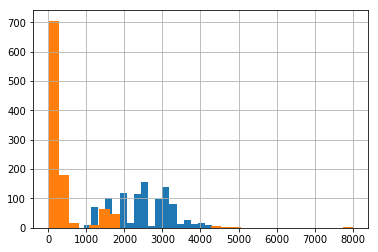

In [41]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

laber_encoder = LabelEncoder()
vehicleCoder = pan.Series(laber_encoder.fit_transform(fail['Max resolution']))
pears = pearsonr(fail['Price'], vehicleCoder)
spearm = spearmanr(fail['Price'], vehicleCoder)

print("Коэффициент корреляции Пирсона: ", pears)
print("Коэффициент корреляции Спирмена: ", spearm)

if (spearm[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

print(fail['Max resolution'].hist(bins = 30))
print(fail['Price'].hist(bins = 30))  

## Пункт №3

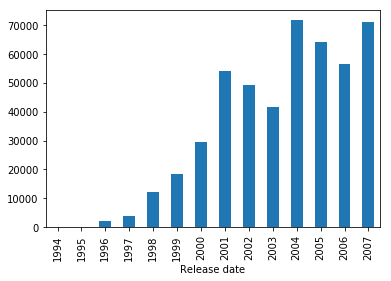

In [43]:
fail.groupby(['Release date'])['Price'].sum().plot(kind = 'bar',rot=90)

## Пункт №4

In [23]:
model = fail['Model'].max()
print('Самая популярная модель: ' + model)

Самая популярная модель: Toshiba PDR-T10


## Пункт №5

In [25]:
fail['Proizvedeniy'] = [n for n in (fail['Low resolution'] * fail['Max resolution'] )]
fail.head(10)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Proizvedeniy
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,655360.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,819200.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,0.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,737280.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,737280.0
5,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0,1024000.0
6,Agfa ePhoto CL50,1999,1280.0,640.0,1.0,34.0,102.0,0.0,0.0,8.0,0.0,0.0,179.0,819200.0
7,Canon PowerShot 350,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0,0.0
8,Canon PowerShot 600,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0,532480.0
9,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0,1310720.0


## Пункт №6

In [29]:
fail1 = fail
fail1 = fail1.dropna()
print('Количество записей в исходном файле:', camera.shape,)
print('Количество записей, после удаления:', camera_duplicat.shape,)

Количество записей в исходном файле: (1038, 13)
Количество записей, после удаления: (1036, 13)


## Пункт №7

In [49]:
min_price = fail['Price'].min()
max_price = fail['Price'].max()
print('Максимальная цена: ', max_price)
print('Минимальная цена: ', min_price)

Максимальная цена:  7999.0
Минимальная цена:  14.0


## Пункт №8

In [50]:
year = fail.groupby('Release date')['Model'].count()
print(year)
model = fail['Release date'].max()
print('Максимально камер было выпущено в', model, 'году')

Release date
1994      1
1995      1
1996      4
1997     11
1998     32
1999     53
2000     61
2001     85
2002     89
2003    101
2004    141
2005    143
2006    153
2007    163
Name: Model, dtype: int64
Максимально камер было выпущено в 2007 году
